## **Sommaire**

1. [Importation des bibliothèques](#importation)
2. [Chargement des données](#chargement)
3. [EDA pour le dataset `employees_survey`](#eda_employees_survey)
    1. [Lecture du dataset](#3_lecture)
    2. [Analyse des données](#3_analyse)
    3. [Détection des valeurs manquantes](#3_manquantes)
    4. [Détection des valeurs dupliquées](#3_dupliquees)
    5. [Nettoyage des données](#3_nettoyage)
    6. [Analyse univariée](#3_univariee)
    7. [Analyse bivariée](#3_bivariee)



---

### 1. <a id='importation'>Importation des bibliothèques</a>

In [1]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime
import time

# Ignorer les avertissements
import warnings
warnings.filterwarnings('ignore')

DELIMITER = "--------------------------------"

---

### 2. <a id='chargement'>Chargement des données</a>

In [2]:
# Chargement des données
path = "../data/"
employees_survey = pd.read_csv(path + "employee_survey_data.csv")
general_data = pd.read_csv(path + "general_data.csv")
in_time = pd.read_csv(path + "in_time.csv")
out_time = pd.read_csv(path + "out_time.csv")
manager_survey = pd.read_csv(path + "manager_survey_data.csv")

---

### 3. <a id='eda_employees_survey'>EDA pour le dataset `employees_survey`</a>

#### 3.1. <a id='3_lecture'>Lecture du dataset</a>

In [3]:
# Affichage des 5 premières lignes du dataset
print(employees_survey.head())

print(DELIMITER)

# Affichage des 5 dernières lignes du dataset
print(employees_survey.tail())


   EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0
3           4                      4.0              4.0              3.0
4           5                      4.0              1.0              3.0
--------------------------------
      EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
4405        4406                      4.0              1.0              3.0
4406        4407                      4.0              4.0              3.0
4407        4408                      1.0              3.0              3.0
4408        4409                      4.0              1.0              3.0
4409        4410                      1.0              3.0              NaN


#### 3.2. <a id='3_analyse'>Analyse des données</a>

In [4]:
# Informations de base
print("Informations de base :")
employees_survey.info()
print(DELIMITER)

# Sommaire des statistiques
print("Sommaire des statistiques :")
print(employees_survey.describe())

Informations de base :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB
--------------------------------
Sommaire des statistiques :
        EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
count  4410.000000              4385.000000      4390.000000      4372.000000
mean   2205.500000                 2.723603         2.728246         2.761436
std    1273.201673                 1.092756         1.101253         0.706245
min       1.000000                 1.000000         1.000000         1.000000
25%    1103.250000                 2.000000 

#### 3.3. <a id='3_manquantes'>Détection des valeurs manquantes</a>


In [5]:
# Nombre de valeurs nulles par colonnes
print(employees_survey.isnull().sum())

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64


#### 3.4. <a id='3_dupliquees'>Détection des valeurs dupliquées</a>


In [6]:
print(f"Nombre de valeurs dupliquées : {employees_survey.duplicated().sum()}")

Nombre de valeurs dupliquées : 0


**Résumé du dataset employees_survey**

**Structure générale**
- Nombre de lignes : 4410
- Nombre de colonnes : 4

**Colonnes**
1. *EmployeeID (int64)*
- Identifiant unique pour chaque employé
- Pas de valeurs manquantes

2. *EnvironmentSatisfaction (float64)*
- Score de satisfaction par rapport à l'environnement de travail
- Échelle de 1 à 4
- 25 valeurs manquantes
- Moyenne : 2.72
- Médiane : 3.0

3. *JobSatisfaction (float64)*
- Score de satisfaction au travail
- Échelle de 1 à 4
- 20 valeurs manquantes
- Moyenne : 2.73
- Médiane : 3.0

4. *WorkLifeBalance (float64)*
- Score d'équilibre vie professionnelle/personnelle
- Échelle de 1 à 4
- 38 valeurs manquantes
- Moyenne : 2.76
- Médiane : 3.0

**Points notables**
- Pas de doublons dans le dataset, donc aucun besoin de gérer ce cas de figure
- Les scores sont tous sur une échelle de 1 à 4
- La distribution des scores est relativement équilibrée autour de la moyenne
- Le nombre de valeurs manquantes est relativement faible (moins de 1% des données)
- Les moyennes des trois métriques de satisfaction sont très proches (entre 2.72 et 2.76)

#### 3.5. <a id='3_nettoyage'>Nettoyage des données</a>

Pour gérer le cas des données manquantes dans le dataset employees_survey, nous allons les remplacer par la valeur moyenne de chaque colonne.


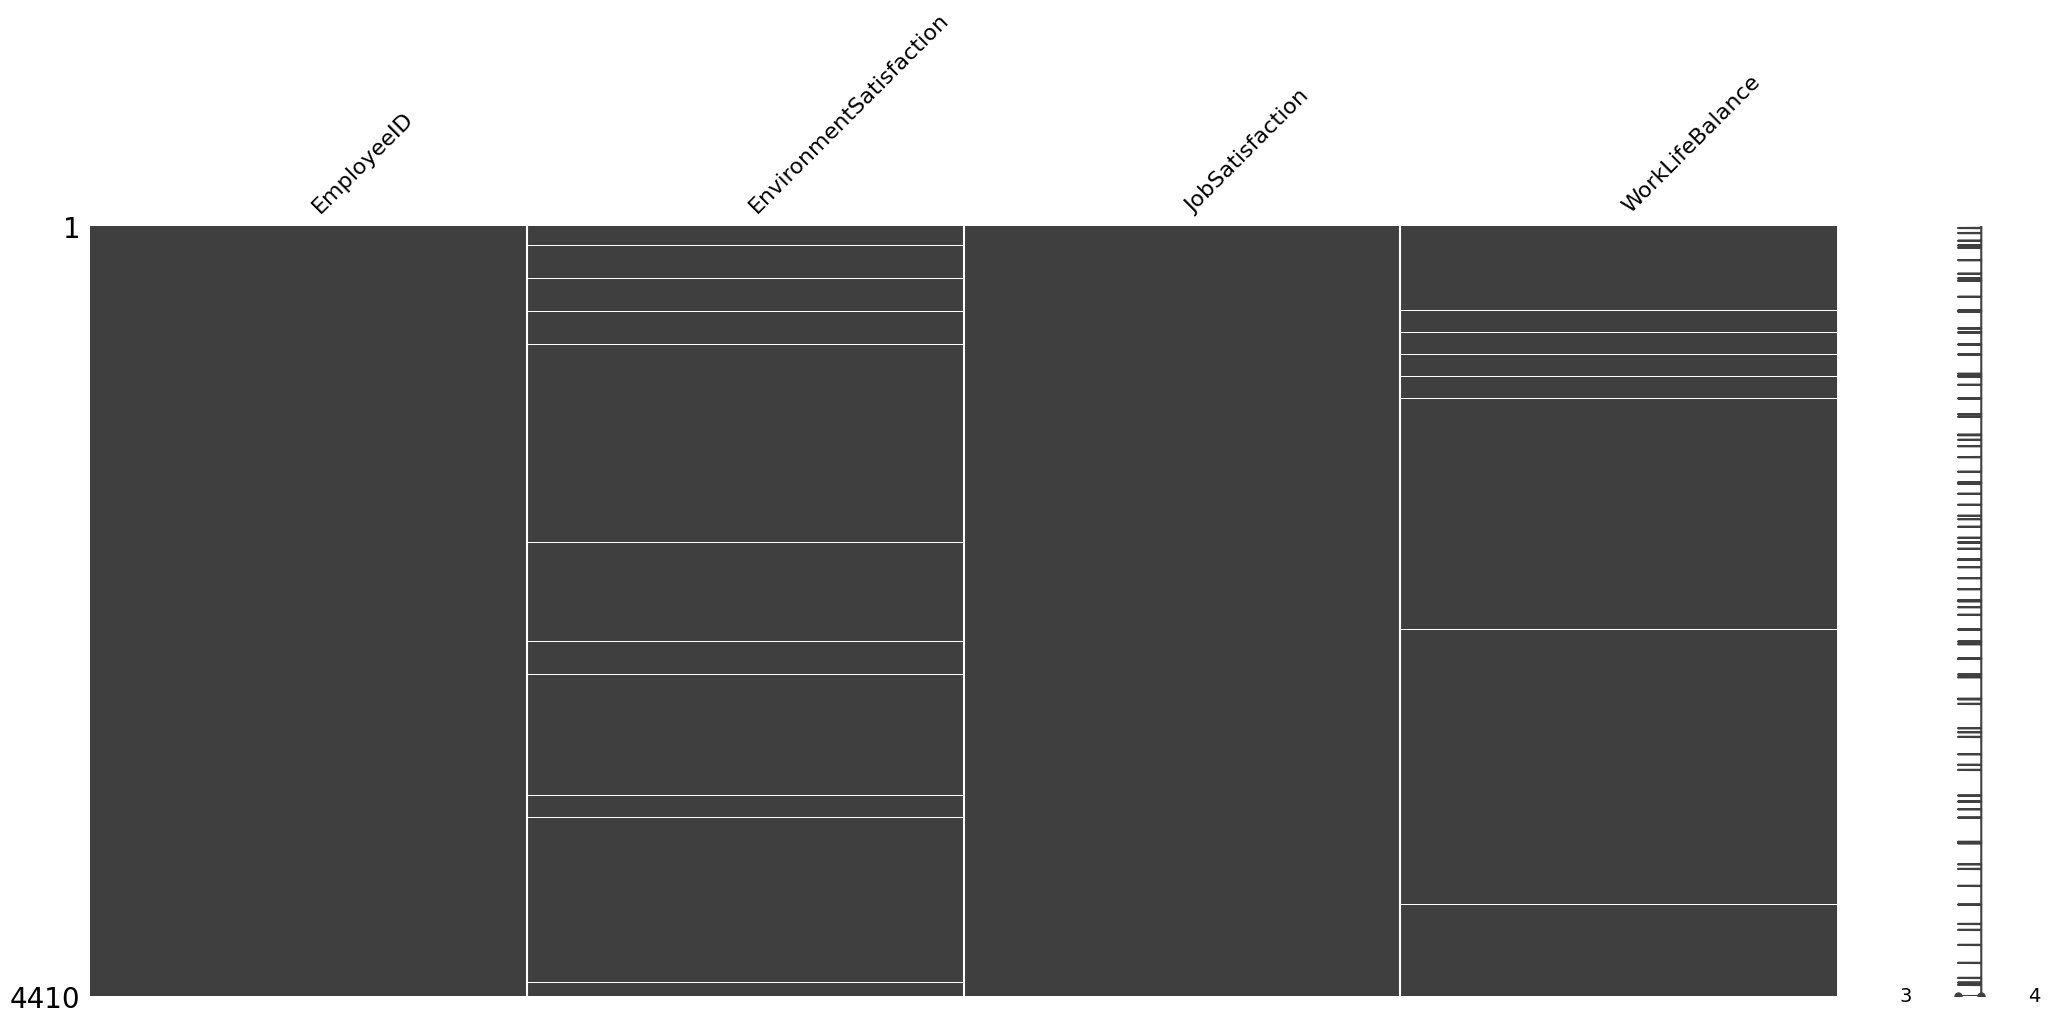

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64


In [7]:
# Visualisation des données manquantes
msno.matrix(employees_survey)
plt.show()

# Identification des colonnes numériques
numerical_columns = employees_survey.select_dtypes(include=['int64', 'float64']).columns
employees_survey[numerical_columns] = employees_survey[numerical_columns].fillna(employees_survey[numerical_columns].mean())

# Affichage du nombre de données manquantes
print(employees_survey.isnull().sum())

#### 3.6. <a id='3_univariee'>Analyse univariée</a>

In [8]:
# Comme la colonne EmployeeID est juste une liste d'ID, elle n'est pas pertinente pour l'analyse
numerical_columns = numerical_columns.drop('EmployeeID')
print(f"Colonnes numériques : {numerical_columns.tolist()}")

Colonnes numériques : ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']


3.6.1. Histogramme

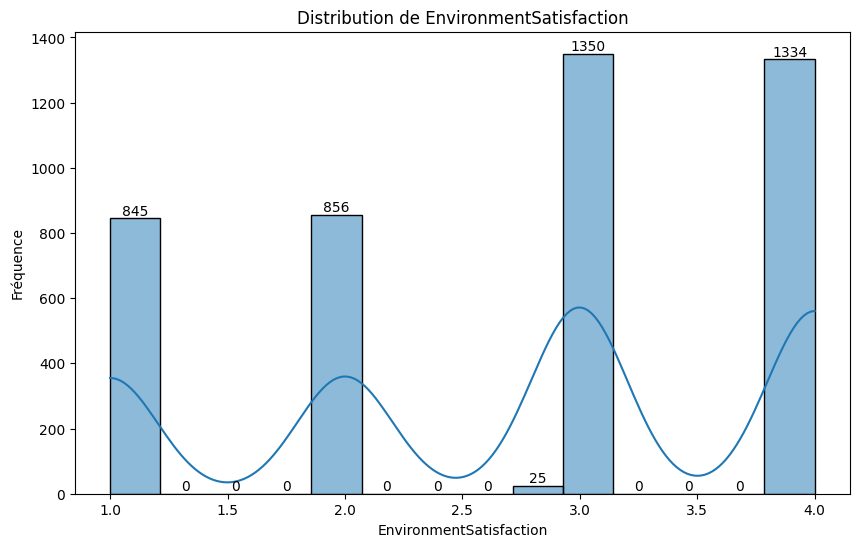

--------------------------------


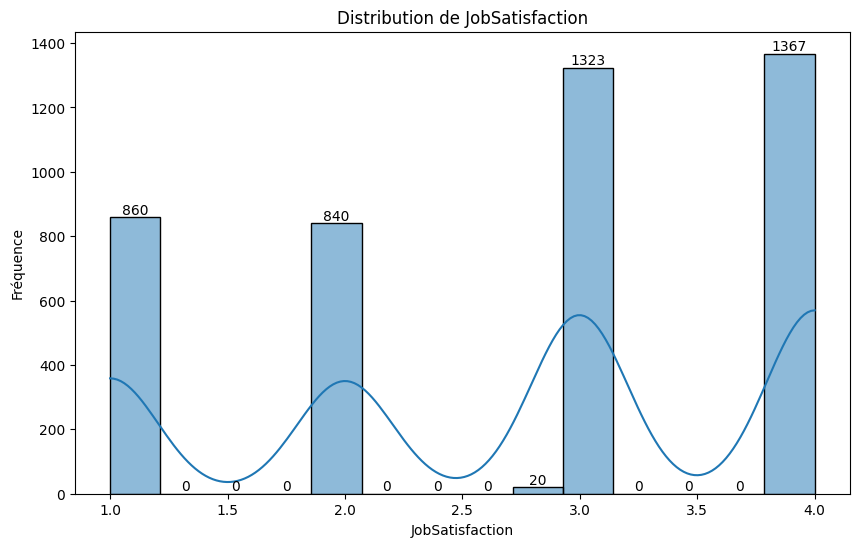

--------------------------------


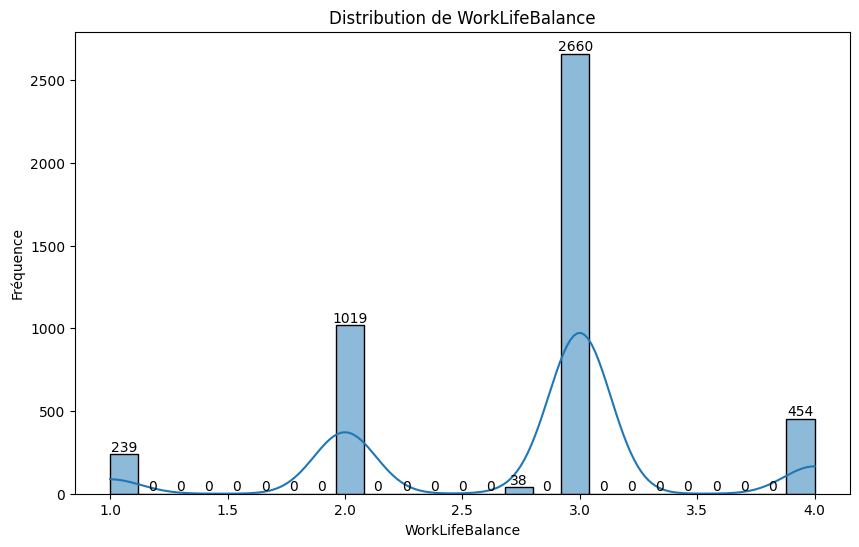

--------------------------------


In [9]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(employees_survey[column], kde=True)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')

    # Ajouter les valeurs sur le graphe
    for i in ax.containers:
        ax.bar_label(i)

    plt.show()
    print(DELIMITER)

**Observations**
- Distribution relativement uniforme pour `EnvironmentSatisfaction`et `JobSatisfaction`
- Distribution plus concentrée pour le métrique `WorkLifeBalance`
- Pics observés sur le niveau 3 pour les trois métriques
- Niveau 1 est le moins fréquent
- Les métriques montrent des tendances positives (médianes à 3 sur 4)
- Les valeurs en dehors des niveaux correspondent aux outliers qui ont été remplacés par la valeur moyenne

=======================================================================================================


#### <a id='3_bivariee'>3.7. Analyse bivariée</a>

3.7.1. Boxplots

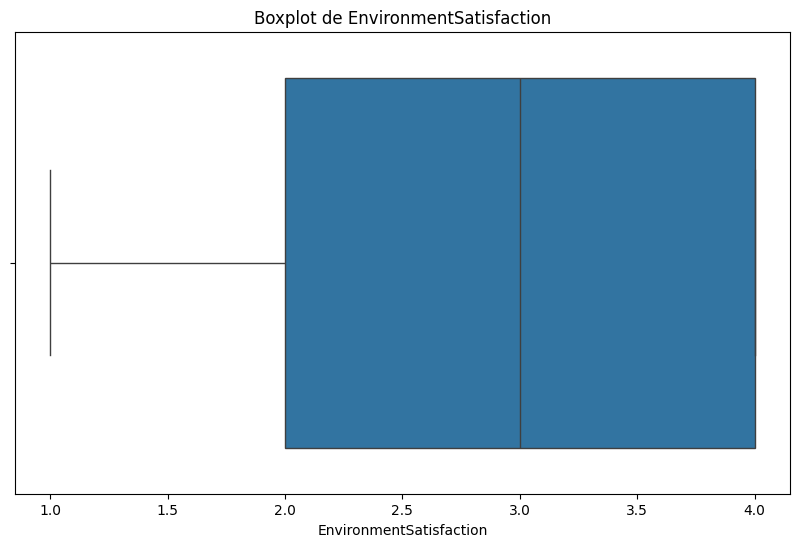

--------------------------------


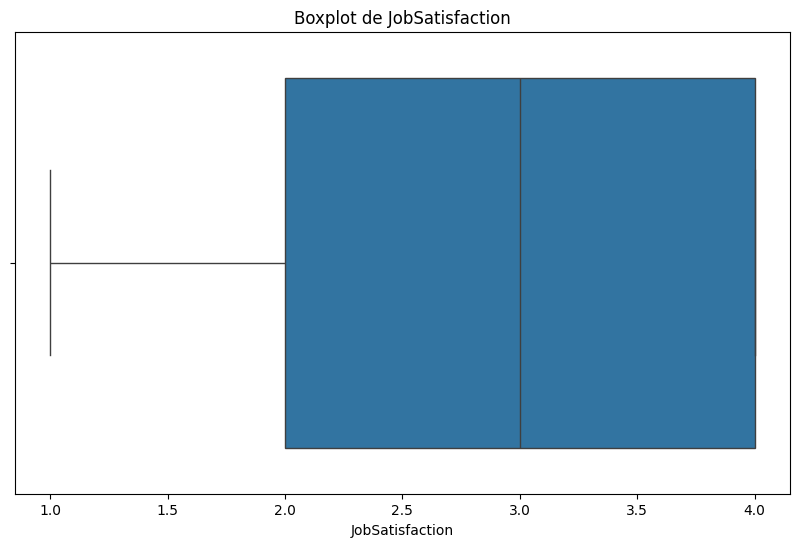

--------------------------------


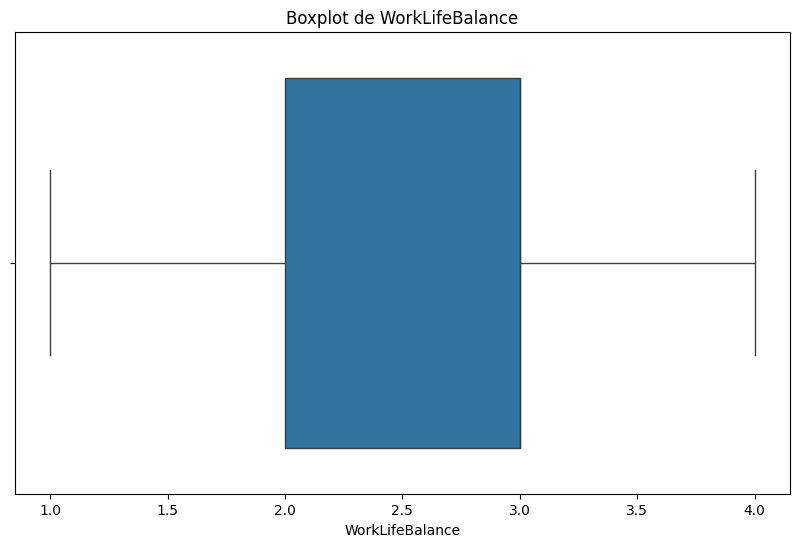

--------------------------------


In [10]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, data=employees_survey)
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()
    print(DELIMITER)

**Observations**
- Les trois métriques montrent des tendances positivies (médianes à 3 sur 4)
- `WorkLifeBalance` montre moins de variation que les autres métriques
- Absence d'outliers (valeurs aberrantes), ce qui suggère des données cohérentes
- Les distributions sont relativements symétriques

=======================================================================================================

3.7.2. Heatmaps

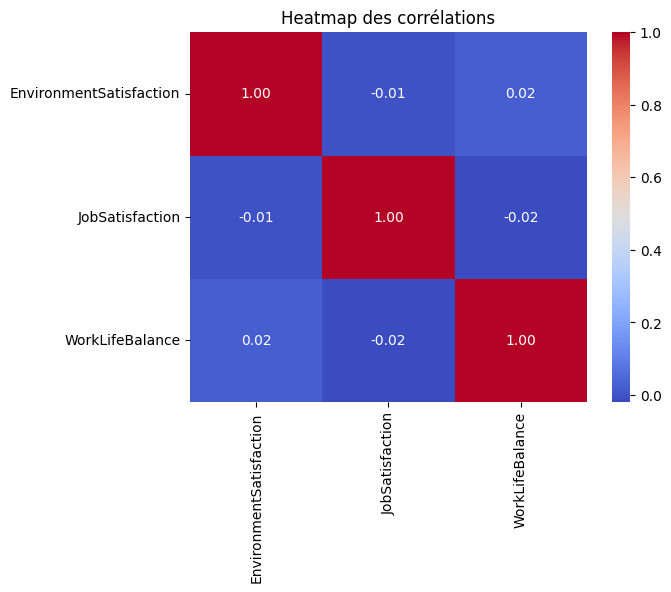

In [11]:
# Calcul de la matrice de corrélation
corr_matrix = employees_survey[['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']].corr()

# Création de la heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap des corrélations')
plt.show()

**Observations**
- `EnvironmentSatisfaction` vs `JobSatisfaction` -> Corrélation de -0.01 -> Pratiquement aucune relation
- `EnvironmentSatisfaction` vs `WorkLifeBalance` -> Corrélation de 0.02 -> Pas de relation significative
- `JobSatisfaction` vs `WorkLifeBalance` -> Corrélation de -0.01 -> Pas de relation non plus
- Aucune forte dépendance est observée entre ces métriques

=======================================================================================================

3.7.3. Scatterplots

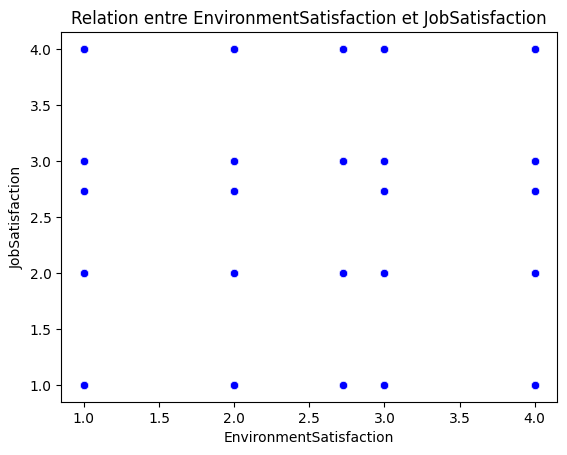

In [12]:
# Scatterplot EnvironmentSatisfaction - JobSatisfaction
sns.scatterplot(data=employees_survey, x='EnvironmentSatisfaction', y='JobSatisfaction', color='blue')
plt.title('Relation entre EnvironmentSatisfaction et JobSatisfaction')
plt.show()

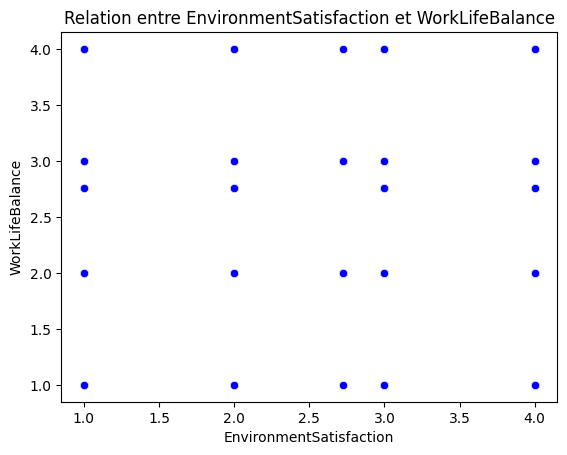

In [13]:
# Scatterplot EnvironmentSatisfaction - WorkLifeBalance
sns.scatterplot(data=employees_survey, x='EnvironmentSatisfaction', y='WorkLifeBalance', color='blue')
plt.title('Relation entre EnvironmentSatisfaction et WorkLifeBalance')
plt.show()

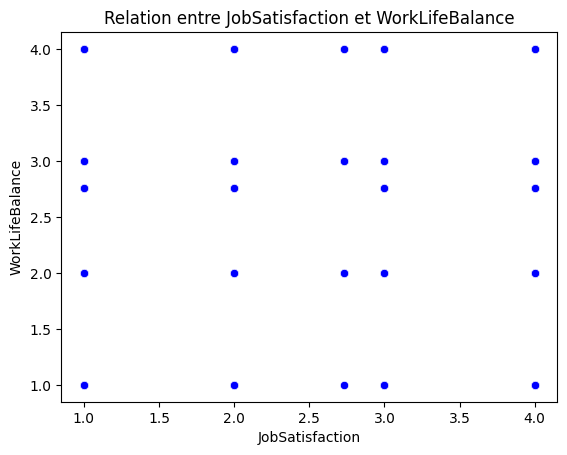

In [14]:
# Scatterplot JobSatisfaction - WorkLifeBalance
sns.scatterplot(data=employees_survey, x='JobSatisfaction', y='WorkLifeBalance', color='blue')
plt.title('Relation entre JobSatisfaction et WorkLifeBalance')
plt.show()

**Observations**
- D'après les graphiques ci-dessus, il semblerait qu'il y ait aucune relation entre les variables, donc qu'elles évoluent indépendamment.
- Une variation dans une variable n'entraînerait aucun changement chez une autre

=======================================================================================================

3.7.3. Diagrammes de densité bivarié (kdeplots)

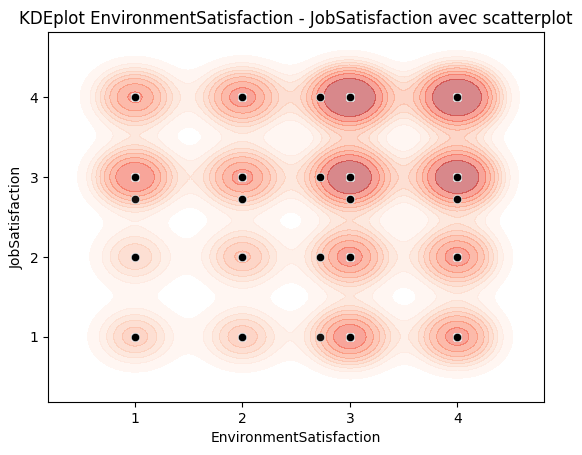

In [15]:
# Kdeplot EnvironmentSatisfaction - JobSatisfaction
sns.kdeplot(x=employees_survey['EnvironmentSatisfaction'], y=employees_survey['JobSatisfaction'], fill=True, cmap="Reds", alpha=0.5)

# Superposition avec un scatterplot pour plus de clarté
sns.scatterplot(x=employees_survey['EnvironmentSatisfaction'], y=employees_survey['JobSatisfaction'], color="black", alpha=0.7)

plt.title("KDEplot EnvironmentSatisfaction - JobSatisfaction avec scatterplot")
plt.show()


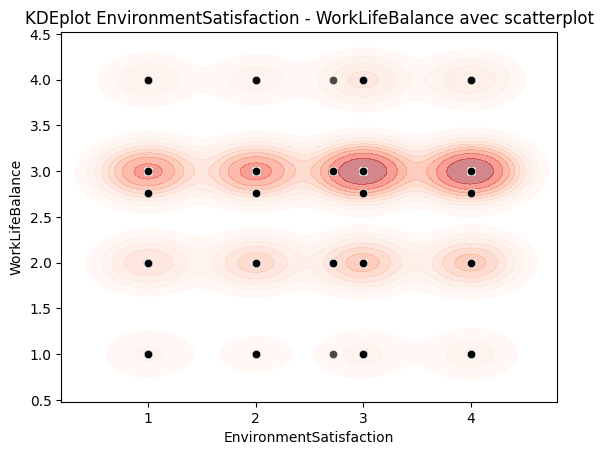

In [16]:
# KDEplot EnvironmentSatisfaction - WorkLifeBalance
sns.kdeplot(x=employees_survey['EnvironmentSatisfaction'], y=employees_survey['WorkLifeBalance'], fill=True, cmap="Reds", alpha=0.5)

sns.scatterplot(x=employees_survey['EnvironmentSatisfaction'], y=employees_survey['WorkLifeBalance'], color="black", alpha=0.7)

plt.title("KDEplot EnvironmentSatisfaction - WorkLifeBalance avec scatterplot")
plt.show()

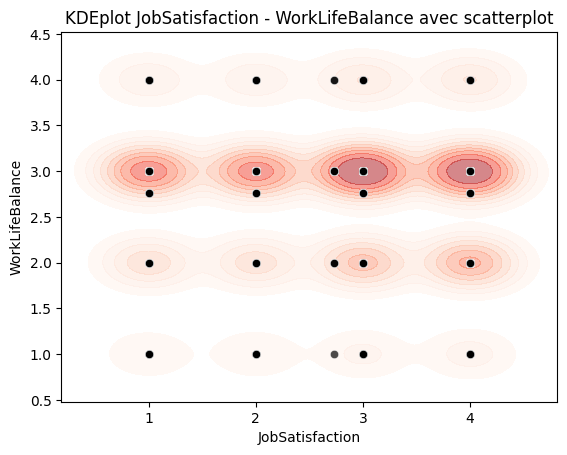

In [17]:
# KDEplot JobSatisfaction - WorkLifeBalance
sns.kdeplot(x=employees_survey['JobSatisfaction'], y=employees_survey['WorkLifeBalance'], fill=True, cmap="Reds", alpha=0.5)

sns.scatterplot(x=employees_survey['JobSatisfaction'], y=employees_survey['WorkLifeBalance'], color="black", alpha=0.7)

plt.title("KDEplot JobSatisfaction - WorkLifeBalance avec scatterplot")
plt.show()

**Observations**
- `EnvironmentSatisfaction` - `JobSatisfaction`
    - Les zones les plus denses se trouvent où `EnvironmentSatisfaction` = 3 ou 4 et `JobSatisfaction` = 3 ou 4, ce qui suggère qu'une majorité des employés sont satisfaits ou très satisfaits dans ces deux métriques
    - Les zones les moins denses se trouvent aux combinaisons faibles de satisfaction
    - Peut suggérer une corrélation potentielle entre les deux variables, mais cela a été refuté dans les étapes précédentes

- `EnvironmentSatisfaction` - `WorkLifeBalance`
    - La densité la plus élevée se trouve lorsque `EnvironmentSatisfaction` = 3 ou 4 et `WorkLifeBalance` = 3, ce qui indique que la majorité des employés ayant une satisfaction environnementale élevée perçevoit leur équilibre vie privée et vie professionnelle comme "Très satisfaisant"
    - Les combinaisons faibles de satisfaction sont très peu fréquentes, à en juger par la densité minimale sur le graphique à ces points
- `JobSatisfaction` - `WorkLifeBalance`
    - Les densités les plus élevées se trouvent autour de `JobSatisfaction` = 3 ou 4 et `WorkLifeBalance` = 3, ce qui montre que la majorité des employés ayant une satisfaction professionnelle élevée perçoivent également leur équilibre travail-vie personnelle comme "Très satisfaisant".
    - Les zones avec `JobSatisfaction` = 1 ou 2 et `WorkLifeBalance` = 1 ou 2 montrent une faible densité, ce qui indique que peu d'employés combinent une faible satisfaction professionnelle avec un mauvais équilibre travail-vie personnelle.

--------

### 4. EDA pour le dataset `manager_survey`

#### 4.1. Lecture du dataset

# <center><font color="orange">WIP !</font></center>

In [ ]:
# Dataset : manager_survey

# Informations de base
print(manager_survey.info())
print(DELIMITER)

# 5 premières lignes du dataset
print(manager_survey.head())
print(DELIMITER)

# Sommaire des statistiques
print(manager_survey.describe())
print(DELIMITER)

# Nombre de valeurs nulles par colonnes
print(manager_survey.isnull().sum())
print(DELIMITER)

# Nombre de valeurs dupliquées
print(manager_survey.duplicated().sum())
print(DELIMITER)


In [ ]:
# Dataset : general_data

# Informations de base
print(general_data.info())
print(DELIMITER)

# 5 premières lignes du dataset
print(general_data.head())
print(DELIMITER)

# Sommaire des statistiques
print(general_data.describe())
print(DELIMITER)

# Nombre de valeurs nulles par colonnes
print(general_data.isnull().sum())
print(DELIMITER)

# Nombre de valeurs dupliquées
print(general_data.duplicated().sum())
print(DELIMITER)

In [ ]:
# Dataset : in_time

# Informations de base
print(in_time.info())
print(DELIMITER)

# 5 premières lignes du dataset
print(in_time.head())
print(DELIMITER)

# Sommaire des statistiques
print(in_time.describe())
print(DELIMITER)

# Nombre de valeurs nulles par colonnes
print(in_time.isnull().sum())
print(DELIMITER)

# Nombre de valeurs dupliquées
print(in_time.duplicated().sum())
print(DELIMITER)

In [ ]:
# Dataset : out_time

# Informations de base
print(out_time.info())
print(DELIMITER)

# 5 premières lignes du dataset
print(out_time.head())
print(DELIMITER)

# Sommaire des statistiques
print(out_time.describe())
print(DELIMITER)

# Nombre de valeurs nulles par colonnes
print(out_time.isnull().sum())
print(DELIMITER)

# Nombre de valeurs dupliquées
print(out_time.duplicated().sum())
print(DELIMITER)